## FashionMNIST dataset - Image classification using CNN

In [41]:
import torch
from torch import nn
import torchvision
from torchvision import datasets   #to impot FashionMNist images
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.0
0.15.0


FashionMNIST from torchvision.datasets
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [42]:
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [43]:
len(train_data), len(test_data)

(60000, 10000)

In [44]:
#a sample image (the first one)
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [45]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [46]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [47]:
train_data.targets  #classes

tensor([9, 0, 0,  ..., 3, 0, 5])

The 3 values in image shape are `color_channels, height, width` in order.

In this dataset color_channel= 1 because images are gray. If colores, the value is 3.

In [48]:
#the shape of the first image
print(f"Image shape: {image.shape}")      #color_channels (RGB), height, width
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])
Image label: Ankle boot


We need to squeez the image shape to plot it. Removes dimensions with size 1.

image shape: torch.Size([1, 28, 28])
squeezed image shape: torch.Size([28, 28])


Text(0.5, 1.0, '9')

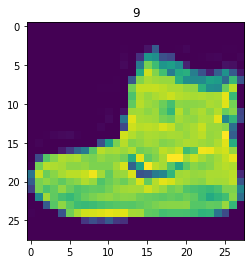

In [49]:
image, label = train_data[0]
print(f"image shape: {image.shape}")
print(f"squeezed image shape: {image.squeeze().shape}")
plt.imshow(image.squeeze())
plt.title(label)

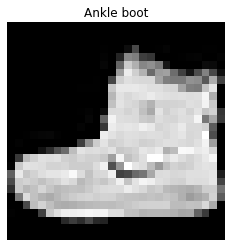

In [50]:
#change the setting of cmap in plt.imshow for gray images
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

In [51]:
print(torch.randint(0, len(train_data), size=[1]))     #tensor
print(torch.randint(0, len(train_data), size=[1]).item())  #value

tensor([38969])
17163


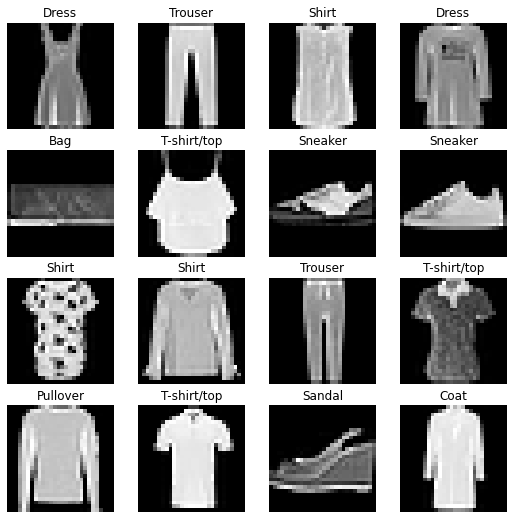

In [52]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()     #size defines the shape of the putput tensor
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [53]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [54]:
#create Dataloader

#DataLoader turns our dataset which is in the form of PyTorch Datasets into a Python iterable
from torch.utils.data import DataLoader

BATCH_SIZE = 32

#turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb730f95b50>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb730f950a0>)

In [55]:
#the length of dataloaders
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fb730f95b50>, <torch.utils.data.dataloader.DataLoader object at 0x7fb730f950a0>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [56]:
#what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))   # next gets the next item from an iterable
train_features_batch.shape, train_labels_batch.shape                      # iter turns the object to iterable

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
squeezed image size: torch.Size([28, 28])
label: 0, label size: torch.Size([])


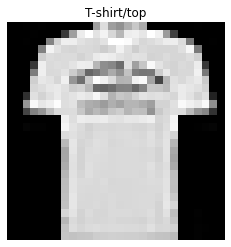

In [57]:
#an image from training batches
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"squeezed image size: {img.squeeze().shape}")
print(f"label: {label}, label size: {label.shape}")

In [58]:
# device cpu or gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'


The CNN model is TinyVGG architecture from the https://poloclub.github.io/cnn-explainer/.

For 2d images nn.Conv2d() (there are 1d for text and 3d): https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html



Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer

Where the contents of [Convolutional layer -> activation layer -> pooling layer] can be upscaled and repeated multiple times, depending on requirements.

In [21]:
# CNN
class cnnmodel1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()         #inherit from nn.Module
        self.conv_block_1 = nn.Sequential(          
        nn.Conv2d(in_channels=input_shape,       #input layer
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),                                #activation layer                       
        nn.Conv2d(in_channels=hidden_units,       #convolutional layer
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),                                #activation layer   
        nn.MaxPool2d(kernel_size=2)               #pooling layer
        )
        self.conv_block_2 = nn.Sequential(            #convolutional layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),                               #activation layer  
        nn.Conv2d(in_channels=hidden_units,      #convolutional layer
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),                               #activation layer  
        nn.MaxPool2d(kernel_size=2)              #pooling layer
       )
        self.classifier = nn.Sequential(         #output layer
        nn.Flatten(),                               #flatten the output of the two blocks into a single feature vector
        nn.Linear(in_features=hidden_units*7*7,     # 10*7*7 is the output shape from conv_block2
                  out_features=output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block_1(x)
        #print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x) 
        #print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        #print(f"Output shape of classifier: {x.shape}")
        return x

The in_features of classifier layer = 10 * 7 * 7. 

10,7,7 is the ouput shape of conv_block2 and the flattened version (multiplication) is the input of classifier layer, this is needed for matrix multiplication in classification layer.

The shape of all sample images is 1,28,28.

The layers of the network compress the shape and extract info from images.

If we run the model with an image of size 1,28,28 we will see this

In [22]:
#creating the model with 10 neurons for hidden layers
torch.manual_seed(42)
model1 = cnnmodel1(input_shape=1,       #if the images were colored, input_shape=3 for RGB
                   hidden_units=10, 
                   output_shape=len(class_names)).to(device)

In [23]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
print(rand_image_tensor.shape)

# Pass image through model
model1(rand_image_tensor.unsqueeze(0).to(device))   #unsqueeze to add a dim for batch size

torch.Size([1, 28, 28])


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [24]:
#model1.state_dict()   #adjusted weights and biases of model

In [26]:
# loss function, evaluation metric and optimizer

# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


loss_fn = nn.CrossEntropyLoss()   #multiclass classification
optimizer = torch.optim.SGD(params=model1.parameters(),lr=0.1)

In [27]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device 
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (outputs the raw logits from the model)
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

        # 3. Optimizer zero grad. Sets the gradients of all optimized torch.Tensors to zero.
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step (update the model's parameters once per batch)
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [28]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    
    test_loss, test_acc = 0, 0
  
    # Put the model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            # 1. Forward pass (outputs raw logits)
            test_pred = model(X)

            # 2. Calculuate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                  y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels 
            
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [29]:
print(device)

cpu


In [38]:
# Train and test the model
from tqdm.auto import tqdm   # just for progress bar
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_step(model=model1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
    test_step(model=model1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0

Train loss: 0.31036 | Train acc: 88.80%
Test loss: 0.34429 | Test acc: 87.55%

Epoch: 1

Train loss: 0.29744 | Train acc: 89.15%
Test loss: 0.32542 | Test acc: 88.31%

Epoch: 2

Train loss: 0.28751 | Train acc: 89.49%
Test loss: 0.32457 | Test acc: 88.06%

Epoch: 3

Train loss: 0.28107 | Train acc: 89.72%
Test loss: 0.33875 | Test acc: 87.44%

Epoch: 4

Train loss: 0.27528 | Train acc: 89.84%
Test loss: 0.31832 | Test acc: 88.68%



In [39]:
#model evaluation

from tqdm.auto import tqdm   # just for progress bar

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, 
               accuracy_fn,
               device=device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))  # go from logits -> prediction labels 

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [40]:
# model1 results
model1_results = eval_model(
     model=model1,
     data_loader=test_dataloader,
     loss_fn=loss_fn,
     accuracy_fn=accuracy_fn,
     device=device
)

model1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'cnnmodel1',
 'model_loss': 0.3183196783065796,
 'model_acc': 88.67811501597444}

In [41]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)                     #the number of logits=the number of classes for each image
            #print(pred_logit)        
            #print(pred_logit.squeeze())

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)     #squeeze to remove one dim of tensor of logits

            pred_probs.append(pred_prob)
            

    # turn list into a tensor
    return torch.stack(pred_probs)

In [42]:
# a sample of test data 
import random
# random.seed(42)
test_samples = [] 
test_labels = []
for sample, label in random.sample(list(test_data), k=6):
    test_samples.append(sample)
    test_labels.append(label)

#the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [43]:
len(test_samples)

6

Text(0.5, 1.0, 'Trouser')

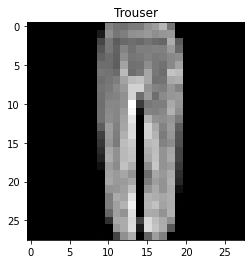

In [44]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [45]:
# Make predictions
pred_probs = make_predictions(model=model1,
                              data=test_samples)
#prediction probabilities 
print(pred_probs.shape)
pred_probs[:]

torch.Size([6, 10])


tensor([[3.8878e-05, 9.9896e-01, 3.1644e-06, 8.9447e-04, 5.0985e-05, 1.6942e-07,
         4.7468e-05, 1.8593e-07, 1.0293e-06, 6.3421e-07],
        [1.4450e-01, 2.8503e-01, 3.6604e-02, 9.0123e-02, 1.8623e-01, 3.2882e-04,
         2.3818e-01, 1.2322e-04, 1.8721e-02, 1.5128e-04],
        [1.1441e-07, 1.3303e-10, 6.0127e-10, 1.0734e-08, 4.9748e-10, 6.2153e-05,
         4.2200e-07, 5.5450e-05, 9.4069e-07, 9.9988e-01],
        [1.7173e-07, 7.9953e-09, 1.2494e-08, 3.9936e-07, 5.1964e-09, 5.0691e-04,
         4.3447e-07, 9.9895e-01, 1.2400e-05, 5.2592e-04],
        [9.0358e-08, 9.9999e-01, 2.0861e-09, 6.1068e-06, 9.3736e-08, 2.3582e-09,
         5.1931e-08, 2.9598e-10, 1.5071e-09, 5.6254e-10],
        [4.9939e-03, 1.1370e-05, 9.7388e-01, 1.2061e-05, 5.7622e-03, 1.8661e-09,
         1.5109e-02, 9.2937e-08, 2.2934e-04, 3.1417e-07]])

In [46]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 1, 9, 7, 1, 2])

In [47]:
test_labels

[1, 6, 9, 7, 1, 2]

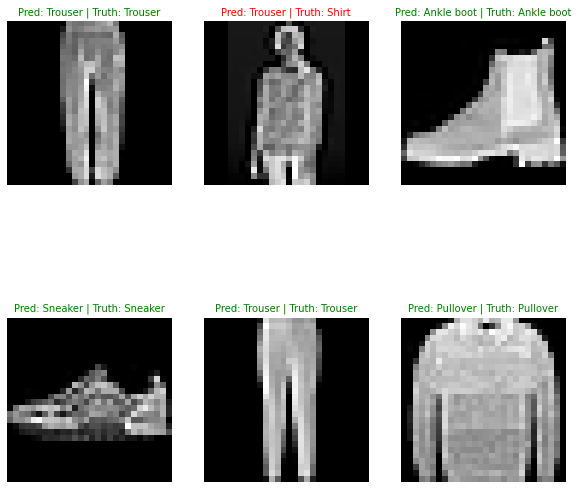

In [48]:
# plot predictions
plt.figure(figsize=(10,10))
nrows = 2
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
    else:
        plt.title(title_text, fontsize=10, c="r") 

    plt.axis(False);